<a href="https://colab.research.google.com/github/unnatikdm/Iphone-Purchasing-Prediction/blob/main/Book_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score
import joblib


In [6]:
data = pd.read_csv("iphone_purchase_records.csv", sep = ',')
data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [7]:
df = data.copy()
df.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [8]:
df.shape

(400, 4)

In [9]:

print("Summary of the DataFrame's structure and content-------")
df.info()

Summary of the DataFrame's structure and content-------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [10]:
df.describe()

,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [11]:
# Convert 'Gender' column to numerical 0 and 1
df_encoded = pd.get_dummies(df, columns=['Gender'], drop_first=True)

# Calculate correlations on the encoded DataFrame
df_encoded.corr()


,Age,Salary,Purchase Iphone,Gender_Male
Age,1.000000,0.155238,0.622454,-0.073741
Salary,0.155238,1.000000,0.362083,-0.060435
Purchase Iphone,0.622454,0.362083,1.000000,-0.042469
Gender_Male,-0.073741,-0.060435,-0.042469,1.000000


In [12]:
# Calculate skewness only on numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns
print("The skewness of the dataset is as follows - ")
print(df[numerical_cols].skew())

The skewness of the dataset is as follows - 
Age                0.231337
Salary             0.495024
Purchase Iphone    0.596903
dtype: float64


In [13]:
df.isnull().sum()

,0
Gender,0
Age,0
Salary,0
Purchase Iphone,0


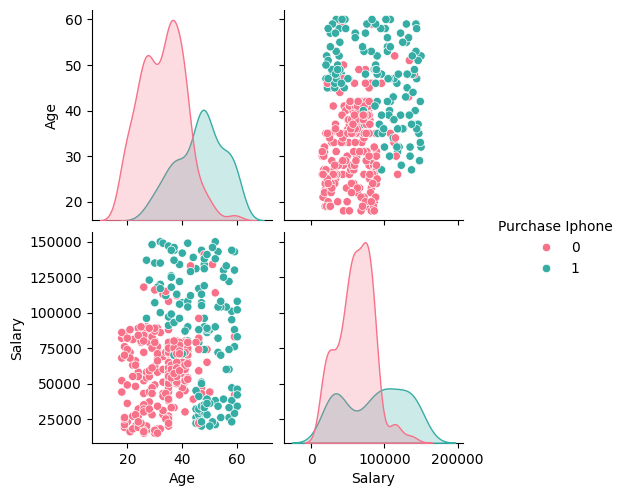

In [14]:
sns.pairplot(data, hue='Purchase Iphone', vars=['Age', 'Salary'], palette='husl')
plt.savefig("pair plot.png")
plt.show()


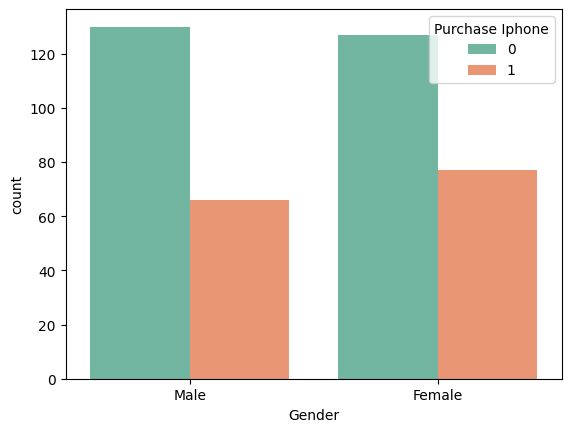

In [15]:
sns.countplot(x='Gender', hue='Purchase Iphone', data=data, palette='Set2')
plt.savefig("gender countplot.png")
plt.show()

In [16]:
df.columns

Index(['Gender', 'Age', 'Salary', 'Purchase Iphone'], dtype='object')

In [17]:
X = data[[ 'Age', 'Salary']]
print(X)


     Age  Salary
0     19   19000
1     35   20000
2     26   43000
3     27   57000
4     19   76000
..   ...     ...
395   46   41000
396   51   23000
397   50   20000
398   36   33000
399   49   36000

[400 rows x 2 columns]


In [18]:
y = data['Purchase Iphone']
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [19]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1234)

In [ ]:
X_train.shape, X_test.shape

In [ ]:
from math import sqrt  ##### Standard method to select K
sqrt(data.shape[0])

In [22]:
clf = KNeighborsClassifier(n_neighbors=15) ####
clf.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=15)

In [23]:
pred = clf.predict(X_test)
pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [24]:
print("The accuracy of the KNeighborsClassifier model is,",round((accuracy_score(y_test,pred)*100),2),"%")

The accuracy of the KNeighborsClassifier model is, 87.5 %


In [25]:
precision = round((precision_score(y_test,pred)*100),2)
print(f'Precision: {precision}',"%")

Precision: 86.96 %


<Axes: >

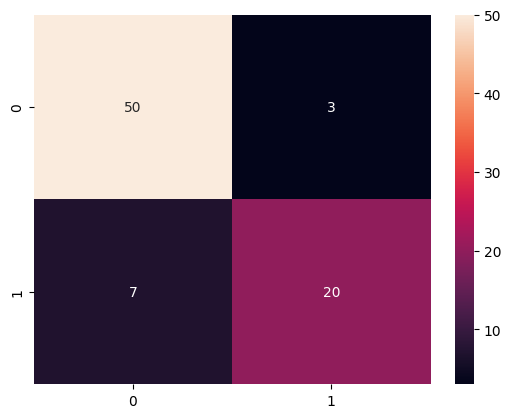

In [26]:
sns.heatmap(confusion_matrix(y_test,pred),annot = True)

In [29]:
##### Error method// Also called as Elbow Method
error = []
for i in range(1,31): ### considering k value from 1 to 30
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    predict_i = clf.predict(X_test)
    error.append(1 - accuracy_score(y_test,predict_i))
error

[0.23750000000000004,
 0.22499999999999998,
 0.17500000000000004,
 0.17500000000000004,
 0.15000000000000002,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.16249999999999998,
 0.16249999999999998,
 0.13749999999999996,
 0.15000000000000002,
 0.16249999999999998,
 0.125,
 0.16249999999999998,
 0.1875,
 0.17500000000000004,
 0.16249999999999998,
 0.16249999999999998,
 0.15000000000000002,
 0.17500000000000004,
 0.15000000000000002,
 0.16249999999999998,
 0.17500000000000004,
 0.1875,
 0.21250000000000002,
 0.1875,
 0.17500000000000004,
 0.17500000000000004]

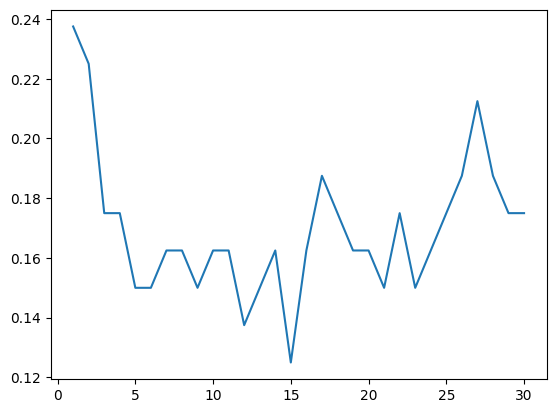

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(1,31), error)

In [36]:

# Example dataset
data = pd.DataFrame({
    'Gender': [0, 1, 0, 1],  # Assuming 0 is Male and 1 is Female
    'Age': [25, 30, 35, 40],
    'Salary': [50000, 60000, 70000, 80000],
    'Purchase Iphone': [0, 1, 0, 1]  # Assuming 0 is No and 1 is Yes
})

# Features and target variable
X = data[['Gender', 'Age', 'Salary']]
y = data['Purchase Iphone']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Training the KNN model
# Set n_neighbors to a value less than or equal to the number of samples in your training data
clf = KNeighborsClassifier(n_neighbors=3)  # Changed n_neighbors to 3
clf.fit(X_train, y_train)

# Taking user input
gender = int(input("Enter Gender (0 for Male, 1 for Female): "))
age = int(input("Enter Age: "))
salary = int(input("Enter Salary: "))

# Create a DataFrame for the new data
new_data = pd.DataFrame([[gender, age, salary]], columns=['Gender', 'Age', 'Salary'])

# Predict the result
prediction = clf.predict(new_data)

# Print the prediction
if prediction == 1:
    print("The model predicts that the user will purchase an iPhone.")
else:
    print("The model predicts that the user will not purchase an iPhone.")

Enter Gender (0 for Male, 1 for Female): 0
Enter Age: 17
Enter Salary: 20000
The model predicts that the user will purchase an iPhone.
